# ECE1513 practical session 2

## perceptron learning algorithm

The Perceptron Learning Algorithm (PLA) is a binary classification supervised learning approach. By updating the weights, the method aims to predict the result for given inputs and minimizes the loss function. The goal is to correctly classify the given data so that the loss function is equal to zero for all data points. This can be accomplished by iteratively carrying out forward and backward passes on given data until the loss reaches zero.

Two phase happen each epoch:
1. Forward pass: making predictions using current weights 
2. Backward pass: updating weights according to the loss function

<img src="https://www.sharpsightlabs.com/wp-content/uploads/2023/07/perceptrons-explained_FEATURED-IMAGE.png" width="800" height="600">


### Forward pass



$y = \sigma (w_0 * x_0 + W_1 * x_1 + W_2 * x_2 + W_3 *x_3)$

$W_0$ compansate for the bias term which is 1

$\sigma$ is the activation function of the PLA which is basically a step function

In [1]:
import numpy as np

training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # two features

weights = np.random.rand(2 + 1)  # features and bias term

prediciton = weights[1] * training_inputs[:,0] + weights[2] * training_inputs[:,1] + weights[0] 

## or

prediciton = np.dot(training_inputs, weights[1:]) + weights[0]
prediciton

array([0.13934653, 0.82008884, 0.85559848, 1.5363408 ])

### Activation function

In [2]:
for i in range(prediciton.shape[0]):
    if prediciton[i] >=0:
        prediciton[i] = 1
    else:
        prediciton[i] = 0
prediciton


array([1., 1., 1., 1.])

In [3]:
def activation( x):
    return 1 if x >= 0 else 0  

for i in range(prediciton.shape[0]):
    prediciton[i] = activation(prediciton[i])

prediciton


array([1., 1., 1., 1.])

Lets have a function for input prediction

In [4]:
def predict(inputs, weights):
    summation = np.dot(inputs, weights[1:]) + weights[0]
    for i in range(prediciton.shape[0]):
        summation[i] = activation(summation[i])
    return summation

### Loss term

Befor we implement the backward pass, we need to define our loos function.
For PLA, the loss function is difference between the target values and the predicted values

$L=\alpha (t-y)$ 
where t are the target labels, y are the predicted labels, and $\alpha$ is the learning rate

In [5]:
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # two features
training_labels = np.array([0, 0, 0, 1])

# predict labels (y)
predicitons = predict(training_inputs, weights)

learning_rate = 0.1
Loss = learning_rate * (training_labels-predicitons)
Loss

array([-0.1, -0.1, -0.1,  0. ])

### Backward pass

Now, lets update our weights to better learn how accurtely predict the labels.

Backward pass: the loss is calcuated during this cycle. if the loss is not zero, we repeat the whole process till we reach convergence

In [6]:
epochs = 10
for i in range(epochs):
    predictions = predict(training_inputs, weights)
    Loss = learning_rate* (training_labels - predicitons)
    print("[it = {}] Loss = {}".format(i, Loss.sum()))
    weights[1:] += np.sum (np.matmul(learning_rate * (training_labels - predictions),  training_inputs))
    weights[0] += np.sum(learning_rate * (training_labels - predictions))


print("final predicitons {}".format(predicitons))

[it = 0] Loss = -0.30000000000000004
[it = 1] Loss = -0.30000000000000004
[it = 2] Loss = -0.30000000000000004
[it = 3] Loss = -0.30000000000000004
[it = 4] Loss = -0.30000000000000004
[it = 5] Loss = -0.30000000000000004
[it = 6] Loss = -0.30000000000000004
[it = 7] Loss = -0.30000000000000004
[it = 8] Loss = -0.30000000000000004
[it = 9] Loss = -0.30000000000000004
final predicitons [1. 1. 1. 1.]


Lets have the PLA in one class 

In [7]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term

    def activation_fn(self, x):
        return 1 if x >= 0 else 0  # Step function

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_fn(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)


sample training

In [8]:
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

perceptron = Perceptron(input_size=2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 0])
print(perceptron.predict(inputs))  # Output: 1


0


Lets check the algorithm on more data

In [9]:
# Generate a linearly separable dataset
def generate_data(n_samples=100):
    X = np.random.randn(n_samples, 2)
    y = np.zeros(n_samples)
    y[X[:, 0] + X[:, 1] > 0] = 1  # Positive class
    return X, y

X, y = generate_data()
X.shape

(100, 2)

Lets scatter the original dataset

Text(0, 0.5, 'Feature 2')

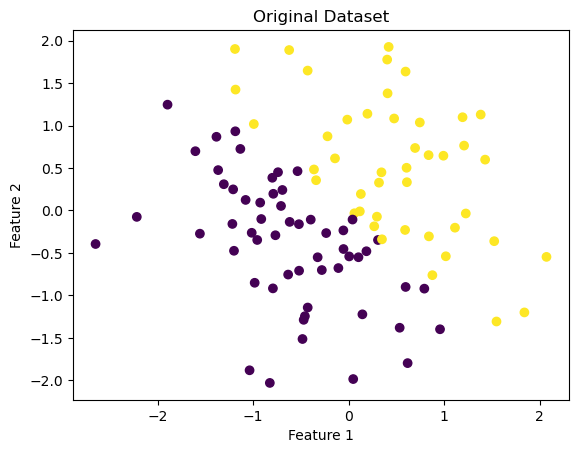

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term
        self.history = {'loss': [], 'accuracy': []}

    def activation_fn(self, x):
        return 1 if x >= 0 else 0  # Step function

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_fn(summation)

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            loss = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
                loss += abs(error)
            accuracy = accuracy_score(labels, [self.predict(inputs) for inputs in training_inputs])
            print("[iter = {}][Loss = {}][accuracy = {}%]".format(epoch, loss/self.epochs, accuracy))
            self.history['loss'].append(loss)
            self.history['accuracy'].append(accuracy)

    def accuracy(self):
        print("Classification accuracy = {} %".format(self.history['accuracy'][-1]))
    def accuracyHistory(self):
        return self.history['accuracy']

# Train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)


[iter = 0][Loss = 0.12][accuracy = 1.0%]
[iter = 1][Loss = 0.0][accuracy = 1.0%]
[iter = 2][Loss = 0.0][accuracy = 1.0%]
[iter = 3][Loss = 0.0][accuracy = 1.0%]
[iter = 4][Loss = 0.0][accuracy = 1.0%]
[iter = 5][Loss = 0.0][accuracy = 1.0%]
[iter = 6][Loss = 0.0][accuracy = 1.0%]
[iter = 7][Loss = 0.0][accuracy = 1.0%]
[iter = 8][Loss = 0.0][accuracy = 1.0%]
[iter = 9][Loss = 0.0][accuracy = 1.0%]
[iter = 10][Loss = 0.0][accuracy = 1.0%]
[iter = 11][Loss = 0.0][accuracy = 1.0%]
[iter = 12][Loss = 0.0][accuracy = 1.0%]
[iter = 13][Loss = 0.0][accuracy = 1.0%]
[iter = 14][Loss = 0.0][accuracy = 1.0%]
[iter = 15][Loss = 0.0][accuracy = 1.0%]
[iter = 16][Loss = 0.0][accuracy = 1.0%]
[iter = 17][Loss = 0.0][accuracy = 1.0%]
[iter = 18][Loss = 0.0][accuracy = 1.0%]
[iter = 19][Loss = 0.0][accuracy = 1.0%]
[iter = 20][Loss = 0.0][accuracy = 1.0%]
[iter = 21][Loss = 0.0][accuracy = 1.0%]
[iter = 22][Loss = 0.0][accuracy = 1.0%]
[iter = 23][Loss = 0.0][accuracy = 1.0%]
[iter = 24][Loss = 0.0][a

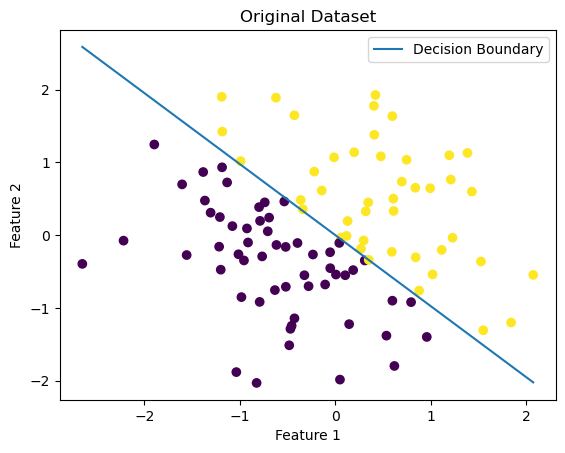

In [12]:
def plot_decision_boundary(X, y, perceptron):
    # Plot original dataset
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('Original Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot decision boundary
    x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_values = (-perceptron.weights[0] - (perceptron.weights[1] * x_values)) / perceptron.weights[2]
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.legend()

    plt.show()

# Plot decision boundary and datasets
plot_decision_boundary(X, y, perceptron)


### Breast Cancer classificaiton using PLA

Lets bring a multidimensional dataset to our PLA. [Breast_Cancer_dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

In [13]:
from sklearn import datasets

# Load the dataset
data, target = datasets.load_breast_cancer(return_X_y=True)
print(data.shape)
print(target.shape)

(569, 30)
(569,)


Train the PLA to detect breast cancer

In [16]:
# Train the models
perceptron = Perceptron(input_size=30, epochs=100)
perceptron.train(data, target)
perceptron.accuracy()

[iter = 0][Loss = 1.68][accuracy = 0.7082601054481547%]
[iter = 1][Loss = 1.31][accuracy = 0.7820738137082601%]
[iter = 2][Loss = 1.23][accuracy = 0.8189806678383128%]
[iter = 3][Loss = 1.19][accuracy = 0.6994727592267135%]
[iter = 4][Loss = 0.85][accuracy = 0.6906854130052724%]
[iter = 5][Loss = 0.89][accuracy = 0.5360281195079086%]
[iter = 6][Loss = 0.96][accuracy = 0.5536028119507909%]
[iter = 7][Loss = 0.7][accuracy = 0.5834797891036907%]
[iter = 8][Loss = 0.74][accuracy = 0.7926186291739895%]
[iter = 9][Loss = 0.72][accuracy = 0.8014059753954306%]
[iter = 10][Loss = 0.82][accuracy = 0.6115992970123023%]
[iter = 11][Loss = 0.61][accuracy = 0.8084358523725835%]
[iter = 12][Loss = 0.93][accuracy = 0.6906854130052724%]
[iter = 13][Loss = 0.7][accuracy = 0.7223198594024605%]
[iter = 14][Loss = 0.67][accuracy = 0.7363796133567663%]
[iter = 15][Loss = 0.64][accuracy = 0.6608084358523726%]
[iter = 16][Loss = 0.72][accuracy = 0.7574692442882249%]
[iter = 17][Loss = 0.73][accuracy = 0.78383

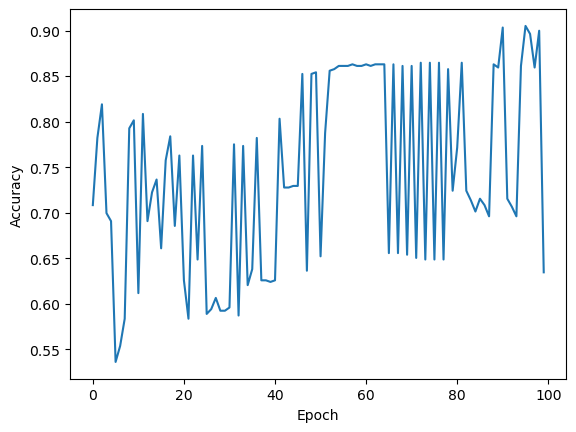

In [17]:
plt.plot(perceptron.accuracyHistory())
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()